In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lbquctrung/worksite-safety-monitoring-dataset")

print("Path to dataset files:", path)

100%|██████████| 98.9M/98.9M [00:02<00:00, 45.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lbquctrung/worksite-safety-monitoring-dataset/versions/1


In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_dir = '/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/train'
test_dir = '/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/test'
valid_dir = '/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/valid'

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import cv2

In [ ]:
train_datagen_noscale = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.85, 1.15],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen_noscale = ImageDataGenerator()
valid_datagen_noscale = ImageDataGenerator()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

===== MODEL SUMMARY =====


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    262,272 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,850,625 (90.98 MB)

 Trainable params: 262,657 (1.00 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5851 - loss: 0.8741

51/51 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5858 - loss: 0.8727 - val_accuracy: 0.7000 - val_loss: 0.5966
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.7040 - loss: 0.6565

51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 594ms/step - accuracy: 0.7044 - loss: 0.6557 - val_accuracy: 0.7650 - val_loss: 0.4526
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.7636 - loss: 0.5337

51/51 ━━━━━━━━━━━━━━━━━━━━ 31s 605ms/step - accuracy: 0.7635 - loss: 0.5338 - val_accuracy: 0.7750 - val_loss: 0.4500
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.8005 - loss: 0.4363

51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 589ms/step - accuracy: 0.8002 - loss: 0.4369 - val_accuracy: 0.8050 - val_loss: 0.4184
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 581ms/step - accuracy: 0.7896 - loss: 0.4682 - val_accuracy: 0.7700 - val_loss: 0.4706
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 585ms/step - accuracy: 0.8057 - loss: 0.4535 - val_accuracy: 0.8000 - val_loss: 0.4372
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 571ms/step - accuracy: 0.8310 - loss: 0.4149 - val_accuracy: 0.8150 - val_loss: 0.4256
Epoch 8/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 597ms/step - accuracy: 0.8285 - loss: 0.3881 - val_accuracy: 0.8250 - val_loss: 0.4211
Epoch 9/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.8266 - loss: 0.3899

51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 584ms/step - accuracy: 0.8269 - loss: 0.3894 - val_accuracy: 0.8400 - val_loss: 0.3954
Epoch 10/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.8357 - loss: 0.3561

51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 595ms/step - accuracy: 0.8358 - loss: 0.3561 - val_accuracy: 0.8450 - val_loss: 0.3914
Epoch 11/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 582ms/step - accuracy: 0.8511 - loss: 0.3595 - val_accuracy: 0.8100 - val_loss: 0.4120
Epoch 12/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 597ms/step - accuracy: 0.8740 - loss: 0.3148 - val_accuracy: 0.8000 - val_loss: 0.4109
Epoch 13/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8605 - loss: 0.3283

51/51 ━━━━━━━━━━━━━━━━━━━━ 31s 610ms/step - accuracy: 0.8607 - loss: 0.3282 - val_accuracy: 0.8450 - val_loss: 0.3687
Epoch 14/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 583ms/step - accuracy: 0.8537 - loss: 0.3521 - val_accuracy: 0.8500 - val_loss: 0.3743
Epoch 15/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 597ms/step - accuracy: 0.8695 - loss: 0.3168 - val_accuracy: 0.8450 - val_loss: 0.3857


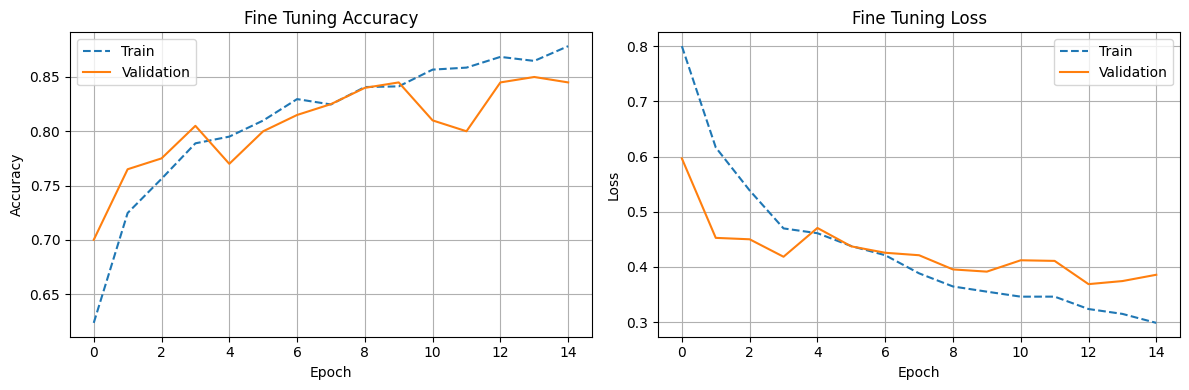

In [ ]:
def plot_results_separated(hist):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(hist.history['accuracy'], linestyle='--', label='Train')
        plt.plot(hist.history['val_accuracy'], linestyle='-', label='Validation')
        plt.title(f"Fine Tuning Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(hist.history['loss'], linestyle='--', label='Train')
        plt.plot(hist.history['val_loss'], linestyle='-', label='Validation')
        plt.title(f"Fine Tuning Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs, outputs)

model.compile(optimizer=optimizers.Adam(1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(f"\n===== MODEL SUMMARY =====")
model.summary()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = callbacks.ModelCheckpoint(f"models/best_fine_tuning_model.h5", save_best_only=True)

train_generator = train_datagen_noscale.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', color_mode="rgb", shuffle=True)

val_generator = valid_datagen_noscale.flow_from_directory(valid_dir, target_size=(224, 224), batch_size=32,  class_mode='binary', color_mode="rgb", shuffle=True)

history = model.fit(train_generator, validation_data=val_generator, epochs=15, callbacks=[early_stop, checkpoint])

plot_results_separated(hist=history)

# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     grad_model = tf.keras.models.Model(
#         [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     with tf.GradientTape() as tape:
#         conv_outputs, predictions = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(predictions[0])
#         class_output = predictions[:, pred_index]

#     grads = tape.gradient(class_output, conv_outputs)
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
#     conv_outputs = conv_outputs[0]

#     heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()

# def show_gradcam(img_path, model, last_conv_layer_name='conv5_block3_out'):
#     img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
#     img_array = tf.keras.preprocessing.image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array = preprocess_input(img_array)

#     heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

#     heatmap = cv2.resize(heatmap, (224, 224))
#     heatmap = np.uint8(255 * heatmap)
#     heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

#     original = tf.keras.preprocessing.image.img_to_array(img).astype(np.uint8)
#     superimposed = cv2.addWeighted(original, 0.6, heatmap_color, 0.4, 0)

#     plt.imshow(superimposed.astype("uint8"))
#     plt.axis('off')
#     plt.show()

# show_gradcam('/kaggle/input/worksite-safety-monitoring-dataset/Worksite-Safety-Monitoring-Dataset/train/safe/1.jpg', model)


In [ ]:
def build_resnet_model(input_shape=(224, 224, 3)):
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    return model

results_resnet = {}

configs = [
  {"epoch": 15, "batch_size": 16, "lr": 5e-5},
    {"epoch": 10, "batch_size": 32, "lr": 5e-5},
    {"epoch": 15, "batch_size": 16, "lr": 1e-4},
    {"epoch": 10, "batch_size": 16, "lr": 1e-4},
    {"epoch": 15, "batch_size": 32, "lr": 1e-4}
    # {"epoch": 15, "batch_size": 32, "lr": 1e-5},
    # {"epoch": 10, "batch_size": 16, "lr": 1e-5},
    # {"epoch": 10, "batch_size": 32, "lr": 1e-5},
    #  {"epoch": 10, "batch_size": 32, "lr": 5e-5},
]

for config in configs:
    print(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")

    model = build_resnet_model()
    opt = optimizers.Adam(learning_rate=config["lr"])

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    print(f"\n===== MODEL SUMMARY =====")
    model.summary()

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    train_generator = train_datagen_noscale.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    valid_generator = valid_datagen_noscale.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    history = model.fit(train_generator,validation_data=valid_generator,epochs=config['epoch'],callbacks=[early_stop])
    results_resnet[(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")] = history

Training: Epoch=15, LR=5e-05, Batch=16
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

===== MODEL SUMMARY =====


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,146,817 (92.11 MB)

 Trainable params: 558,337 (2.13 MB)

 Non-trainable params: 23,588,480 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 59s 430ms/step - accuracy: 0.5344 - loss: 1.0168 - val_accuracy: 0.6400 - val_loss: 0.7234
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - accuracy: 0.6546 - loss: 0.7480 - val_accuracy: 0.7300 - val_loss: 0.5750
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.7304 - loss: 0.5958 - val_accuracy: 0.7400 - val_loss: 0.5647
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - accuracy: 0.7325 - loss: 0.5644 - val_accuracy: 0.7350 - val_loss: 0.5183
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.7647 - loss: 0.5128 - val_accuracy: 0.7500 - val_loss: 0.4795
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.7789 - loss: 0.4849 - val_accuracy: 0.7600 - val_loss: 0.4582
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 282ms/step - accuracy: 0.7737 - loss: 0.5002 - val_accuracy: 0.7750 - val_loss: 0.4433


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ input_layer_3[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_1[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,146,817 (92.11 MB)

 Trainable params: 558,337 (2.13 MB)

 Non-trainable params: 23,588,480 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 50s 710ms/step - accuracy: 0.5194 - loss: 1.0233 - val_accuracy: 0.6350 - val_loss: 0.6476
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 501ms/step - accuracy: 0.6725 - loss: 0.6964 - val_accuracy: 0.6950 - val_loss: 0.6085
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 504ms/step - accuracy: 0.6870 - loss: 0.6404 - val_accuracy: 0.7550 - val_loss: 0.5333
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 500ms/step - accuracy: 0.7357 - loss: 0.5749 - val_accuracy: 0.7450 - val_loss: 0.5262
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 503ms/step - accuracy: 0.7641 - loss: 0.5144 - val_accuracy: 0.7550 - val_loss: 0.5237
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 499ms/step - accuracy: 0.7875 - loss: 0.4761 - val_accuracy: 0.7800 - val_loss: 0.4862
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 27s 539ms/step - accuracy: 0.7771 - loss: 0.5127 - val_accuracy: 0.8000 - val_loss: 0.4465
Epoch 8/10
51/

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_6          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_7          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_8          │ (None, 224, 224)  │          0 │ input_layer_5[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_2 (Stack)     │ (None, 224, 224,  │          0 │ get_item_6[0][0], │
│                     │ 3)                │            │ get_item_7[0][0], │
│                     │                   │            │ get_item_8[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 224, 224,  │          0 │ stack_2[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_2[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_7[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │        129 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,146,817 (92.11 MB)

 Trainable params: 558,337 (2.13 MB)

 Non-trainable params: 23,588,480 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.5265 - loss: 0.9886 - val_accuracy: 0.7000 - val_loss: 0.5621
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step - accuracy: 0.7254 - loss: 0.6003 - val_accuracy: 0.7500 - val_loss: 0.4831
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.7796 - loss: 0.4806 - val_accuracy: 0.7750 - val_loss: 0.4463
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 274ms/step - accuracy: 0.7962 - loss: 0.4543 - val_accuracy: 0.8000 - val_loss: 0.4410
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 262ms/step - accuracy: 0.8018 - loss: 0.4417 - val_accuracy: 0.8150 - val_loss: 0.4280
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.8148 - loss: 0.4211 - val_accuracy: 0.8250 - val_loss: 0.4290
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.8313 - loss: 0.3745 - val_accuracy: 0.8050 - val_loss: 0.4268


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_9          │ (None, 224, 224)  │          0 │ input_layer_7[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_10         │ (None, 224, 224)  │          0 │ input_layer_7[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_11         │ (None, 224, 224)  │          0 │ input_layer_7[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_3 (Stack)     │ (None, 224, 224,  │          0 │ get_item_9[0][0], │
│                     │ 3)                │            │ get_item_10[0][0… │
│                     │                   │            │ get_item_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 224, 224,  │          0 │ stack_3[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_3[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │        129 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,146,817 (92.11 MB)

 Trainable params: 558,337 (2.13 MB)

 Non-trainable params: 23,588,480 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 342ms/step - accuracy: 0.5648 - loss: 0.8879 - val_accuracy: 0.7200 - val_loss: 0.5440
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.7470 - loss: 0.5740 - val_accuracy: 0.7700 - val_loss: 0.4817
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.7646 - loss: 0.5121 - val_accuracy: 0.8000 - val_loss: 0.4556
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.7908 - loss: 0.4708 - val_accuracy: 0.8050 - val_loss: 0.4339
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.8140 - loss: 0.4309 - val_accuracy: 0.8100 - val_loss: 0.4658
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 277ms/step - accuracy: 0.8285 - loss: 0.3950 - val_accuracy: 0.7900 - val_loss: 0.4832
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 272ms/step - accuracy: 0.8449 - loss: 0.3532 - val_accuracy: 0.8200 - val_loss: 0.4480


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_12         │ (None, 224, 224)  │          0 │ input_layer_9[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_13         │ (None, 224, 224)  │          0 │ input_layer_9[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_14         │ (None, 224, 224)  │          0 │ input_layer_9[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_4 (Stack)     │ (None, 224, 224,  │          0 │ get_item_12[0][0… │
│                     │ 3)                │            │ get_item_13[0][0… │
│                     │                   │            │ get_item_14[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 224, 224,  │          0 │ stack_4[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_4[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_13[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │        129 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,146,817 (92.11 MB)

 Trainable params: 558,337 (2.13 MB)

 Non-trainable params: 23,588,480 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 674ms/step - accuracy: 0.5214 - loss: 0.9481 - val_accuracy: 0.6500 - val_loss: 0.6002
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 505ms/step - accuracy: 0.6994 - loss: 0.6207 - val_accuracy: 0.6950 - val_loss: 0.5733
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 510ms/step - accuracy: 0.7874 - loss: 0.4954 - val_accuracy: 0.7700 - val_loss: 0.4958
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 546ms/step - accuracy: 0.7962 - loss: 0.4564 - val_accuracy: 0.7950 - val_loss: 0.4602
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 520ms/step - accuracy: 0.8054 - loss: 0.4357 - val_accuracy: 0.7750 - val_loss: 0.4557
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 514ms/step - accuracy: 0.8403 - loss: 0.3868 - val_accuracy: 0.8250 - val_loss: 0.4105
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 510ms/step - accuracy: 0.8599 - loss: 0.3323 - val_accuracy: 0.8050 - val_loss: 0.4133
Epoch 8/15
51/

In [ ]:
def build_resnet_model_128(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.applications.resnet50.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs, outputs)
    return model


results_resnet = {}

configs = [
    {"epoch": 15, "batch_size": 16, "lr": 1e-4},
    {"epoch": 10, "batch_size": 16, "lr": 1e-4},
    {"epoch": 15, "batch_size": 32, "lr": 1e-4},
    {"epoch": 10, "batch_size": 32, "lr": 1e-4},
]

for config in configs:
    print(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")

    model = build_resnet_model()
    opt = tf.keras.optimizers.Adam(learning_rate=config["lr"])

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    print(f"\n===== MODEL SUMMARY =====")
    model.summary()

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    train_generator = train_datagen_noscale.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    valid_generator = valid_datagen_noscale.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=config['batch_size'],
        class_mode='binary',
        color_mode="rgb",
        shuffle=True
    )

    history = model.fit(train_generator,validation_data=valid_generator,epochs=config['epoch'],callbacks=[early_stop])
    results_resnet[(f"Training: Epoch={config['epoch']}, LR={config['lr']}, Batch={config['batch_size']}")] = history

Training: Epoch=15, LR=0.0001, Batch=16

===== MODEL SUMMARY =====


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_9          │ (None, 224, 224)  │          0 │ input_layer_7[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_10         │ (None, 224, 224)  │          0 │ input_layer_7[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_11         │ (None, 224, 224)  │          0 │ input_layer_7[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_3 (Stack)     │ (None, 224, 224,  │          0 │ get_item_9[0][0], │
│                     │ 3)                │            │ get_item_10[0][0… │
│                     │                   │            │ get_item_11[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 224, 224,  │          0 │ stack_3[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_3[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_6[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        257 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.6168 - loss: 0.8507 - val_accuracy: 0.7200 - val_loss: 0.6437
Epoch 2/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 28s 270ms/step - accuracy: 0.7276 - loss: 0.6038 - val_accuracy: 0.7600 - val_loss: 0.4836
Epoch 3/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.7761 - loss: 0.4992 - val_accuracy: 0.7850 - val_loss: 0.4193
Epoch 4/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.7941 - loss: 0.5019 - val_accuracy: 0.7800 - val_loss: 0.4232
Epoch 5/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.8288 - loss: 0.3830 - val_accuracy: 0.7900 - val_loss: 0.4504
Epoch 6/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.8418 - loss: 0.3654 - val_accuracy: 0.7950 - val_loss: 0.4144
Epoch 7/15
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.8576 - loss: 0.3370 - val_accuracy: 0.7850 - val_loss: 0.4114


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_12         │ (None, 224, 224)  │          0 │ input_layer_9[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_13         │ (None, 224, 224)  │          0 │ input_layer_9[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_14         │ (None, 224, 224)  │          0 │ input_layer_9[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_4 (Stack)     │ (None, 224, 224,  │          0 │ get_item_12[0][0… │
│                     │ 3)                │            │ get_item_13[0][0… │
│                     │                   │            │ get_item_14[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 224, 224,  │          0 │ stack_4[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_4[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │        257 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 354ms/step - accuracy: 0.6296 - loss: 0.7971 - val_accuracy: 0.7250 - val_loss: 0.5948
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.7310 - loss: 0.5830 - val_accuracy: 0.7850 - val_loss: 0.4863
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.7815 - loss: 0.4683 - val_accuracy: 0.8150 - val_loss: 0.4307
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.8100 - loss: 0.4397 - val_accuracy: 0.7850 - val_loss: 0.4759
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 264ms/step - accuracy: 0.8259 - loss: 0.3906 - val_accuracy: 0.8150 - val_loss: 0.4138
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.8567 - loss: 0.3443 - val_accuracy: 0.8200 - val_loss: 0.4098
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 265ms/step - accuracy: 0.8443 - loss: 0.3506 - val_accuracy: 0.8350 - val_loss: 0.4041


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_15         │ (None, 224, 224)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_16         │ (None, 224, 224)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_17         │ (None, 224, 224)  │          0 │ input_layer_11[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_5 (Stack)     │ (None, 224, 224,  │          0 │ get_item_15[0][0… │
│                     │ 3)                │            │ get_item_16[0][0… │
│                     │                   │            │ get_item_17[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 224, 224,  │          0 │ stack_5[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_5[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_10[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │        257 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 676ms/step - accuracy: 0.5889 - loss: 0.8557 - val_accuracy: 0.6700 - val_loss: 0.6381
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 518ms/step - accuracy: 0.7376 - loss: 0.5511 - val_accuracy: 0.7750 - val_loss: 0.4644
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 516ms/step - accuracy: 0.7981 - loss: 0.4553 - val_accuracy: 0.7800 - val_loss: 0.4146
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 501ms/step - accuracy: 0.8107 - loss: 0.4338 - val_accuracy: 0.8100 - val_loss: 0.3940
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 508ms/step - accuracy: 0.8225 - loss: 0.3938 - val_accuracy: 0.8200 - val_loss: 0.3743
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 511ms/step - accuracy: 0.8460 - loss: 0.3741 - val_accuracy: 0.8550 - val_loss: 0.3666
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 503ms/step - accuracy: 0.8521 - loss: 0.3535 - val_accuracy: 0.8550 - val_loss: 0.3691
Epoch 8/15
51/

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_18         │ (None, 224, 224)  │          0 │ input_layer_13[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_19         │ (None, 224, 224)  │          0 │ input_layer_13[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_20         │ (None, 224, 224)  │          0 │ input_layer_13[0… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_6 (Stack)     │ (None, 224, 224,  │          0 │ get_item_18[0][0… │
│                     │ 3)                │            │ get_item_19[0][0… │
│                     │                   │            │ get_item_20[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 224, 224,  │          0 │ stack_6[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_6[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 256)       │    524,544 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense_12[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 1)         │        257 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

Found 1620 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 686ms/step - accuracy: 0.6183 - loss: 0.8156 - val_accuracy: 0.7200 - val_loss: 0.5643
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 507ms/step - accuracy: 0.7315 - loss: 0.6185 - val_accuracy: 0.7850 - val_loss: 0.4516
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 502ms/step - accuracy: 0.7708 - loss: 0.4950 - val_accuracy: 0.8150 - val_loss: 0.4137
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 509ms/step - accuracy: 0.8160 - loss: 0.4119 - val_accuracy: 0.8400 - val_loss: 0.3845
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 507ms/step - accuracy: 0.8293 - loss: 0.3861 - val_accuracy: 0.8350 - val_loss: 0.3750
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 504ms/step - accuracy: 0.8141 - loss: 0.4113 - val_accuracy: 0.8250 - val_loss: 0.3814
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 503ms/step - accuracy: 0.8720 - loss: 0.3104 - val_accuracy: 0.8300 - val_loss: 0.3958
Epoch 8/10
51/

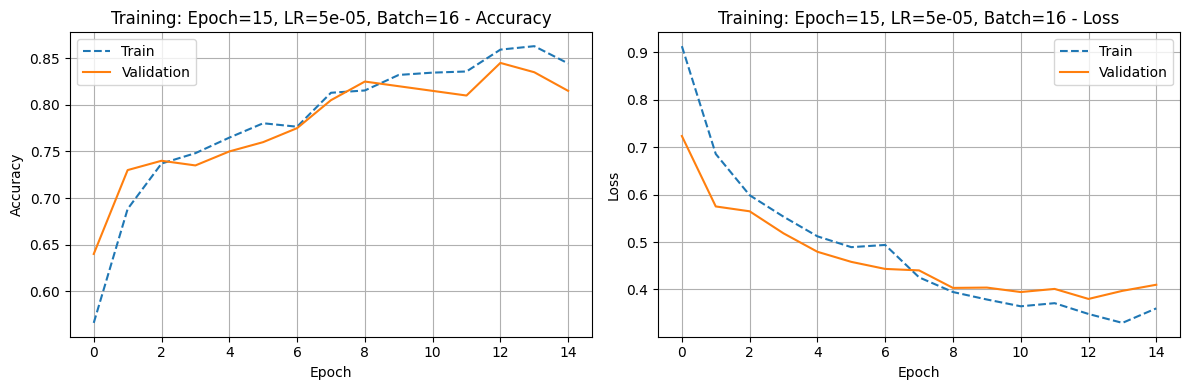

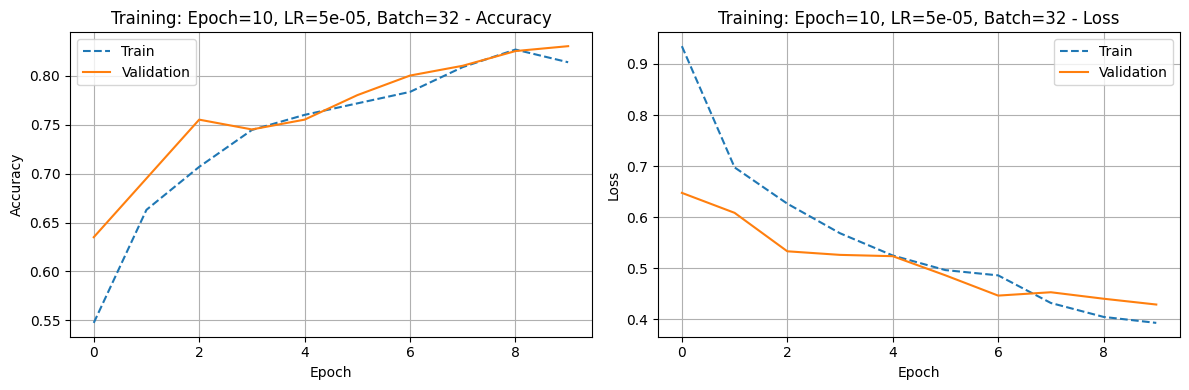

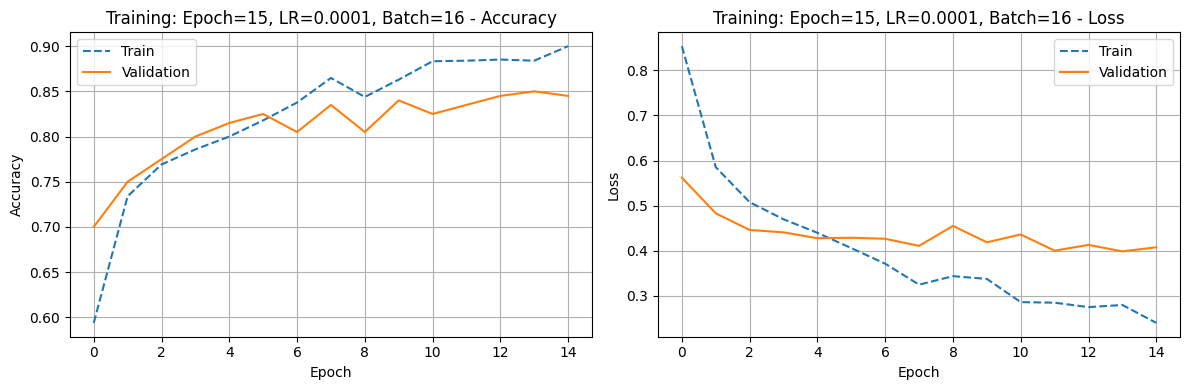

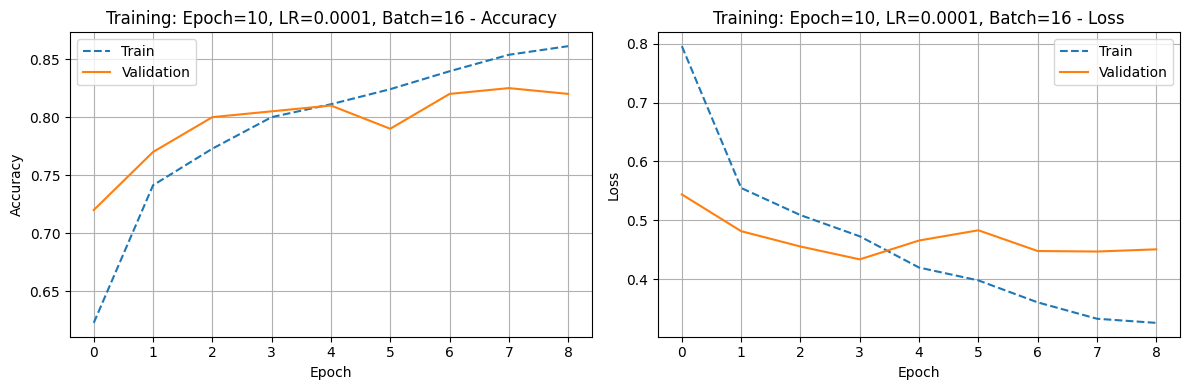

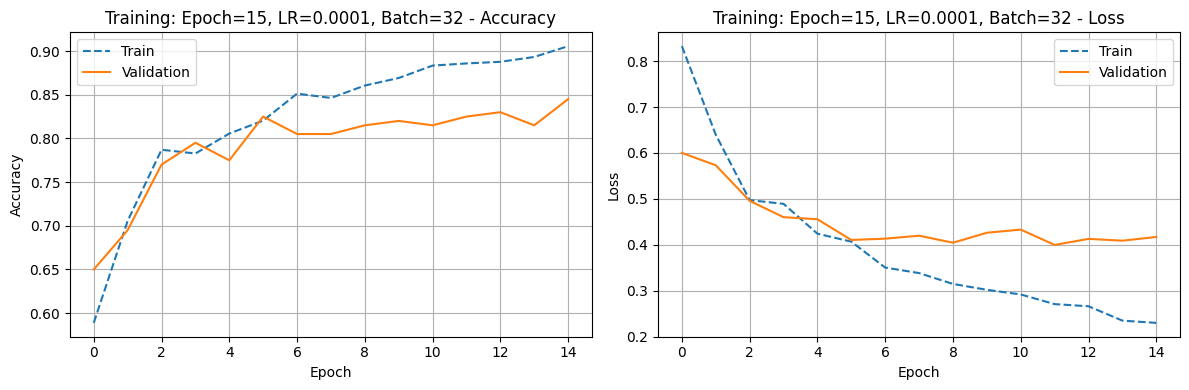

In [ ]:
def plot_results_separated(results):
    for name, hist in results.items():
        plt.figure(figsize=(12, 4))

        # Accuracy plot
        plt.subplot(1, 2, 1)
        plt.plot(hist.history['accuracy'], linestyle='--', label='Train')
        plt.plot(hist.history['val_accuracy'], linestyle='-', label='Validation')
        plt.title(f"{name} - Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)

        # Loss plot
        plt.subplot(1, 2, 2)
        plt.plot(hist.history['loss'], linestyle='--', label='Train')
        plt.plot(hist.history['val_loss'], linestyle='-', label='Validation')
        plt.title(f"{name} - Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

plot_results_separated(results_resnet)